<a href="https://colab.research.google.com/github/rasoco/insurance_travel/blob/main/insurance_travel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA and Machine Learning of insurance data. 

Context:

A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.
The New Insurance Package Also Includes Covid Cover.
The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.
The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.
The Data Is Provided For Almost 2000 Of Its Previous Customers And You Are Required To Build An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance Package Based On Certain Parameters Given Below.

Contexto:

Una empresa de viajes y excursiones ofrece un paquete de seguro de viaje a sus clientes.
El nuevo paquete de seguro también incluye la cobertura Covid.
La empresa requiere saber qué clientes estarían interesados ​​en comprarlo en función del historial de su base de datos.
El seguro se ofreció a algunos de los clientes en 2019 y los datos proporcionados se han extraído del rendimiento / ventas del paquete durante ese período.
Los datos se proporcionan para casi 2000 de sus clientes anteriores y debe crear un modelo inteligente que pueda predecir si el cliente estará interesado en comprar el paquete de seguro de viaje en función de ciertos parámetros que se detallan a continuación.


Data source: https://www.kaggle.com/tejashvi14/travel-insurance-prediction-data


#### Load of libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load of data

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/insurance/TravelInsurancePrediction.csv")

In [3]:
# Head of data 
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


#### Manipulation of data

In [4]:
# Dimension of data: 1987 observations and 10 variables
data.shape

(1987, 10)

In [5]:
# Names of columns
data.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [6]:
# Type of data 
data.dtypes

Unnamed: 0              int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [7]:
# Renaming of columns
data = data.rename(columns = {"Unnamed: 0":"id"})
data.columns = data.columns.str.lower()

In [8]:
# Count NaN values
data.isna().sum()

id                     0
age                    0
employment type        0
graduateornot          0
annualincome           0
familymembers          0
chronicdiseases        0
frequentflyer          0
evertravelledabroad    0
travelinsurance        0
dtype: int64

In [9]:
# Unique values each colum
print(data.apply(lambda column: column.unique()))

id                     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
age                         [31, 34, 28, 25, 33, 26, 32, 29, 35, 30, 27]
employment type        [Government Sector, Private Sector/Self Employed]
graduateornot                                                  [Yes, No]
annualincome           [400000, 1250000, 500000, 700000, 1150000, 130...
familymembers                                   [6, 7, 4, 3, 8, 9, 5, 2]
chronicdiseases                                                   [1, 0]
frequentflyer                                                  [No, Yes]
evertravelledabroad                                            [No, Yes]
travelinsurance                                                   [0, 1]
dtype: object


In [10]:
# Change values of columns graduateornot, evertravelldabroad, travelinsurance
data["graduateornot"] = data["graduateornot"].replace(["Yes", "No"], [1, 0])

data["frequentflyer"] = data["frequentflyer"].replace(["No", "Yes"], [0, 1])

data["evertravelledabroad"] = data["evertravelledabroad"].replace(["No", "Yes"], [0, 1])

#### Analysis of data



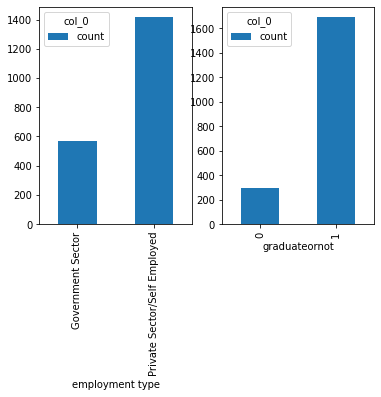

In [11]:
# Plot 1 of data 
fig, (ax1, ax2) = plt.subplots(1, 2)
pd.crosstab(index=data.iloc[:,2], columns="count").plot(kind="bar", ax= ax1)
pd.crosstab(index=data.iloc[:,3], columns="count").plot(kind="bar", ax= ax2)
plt.show()


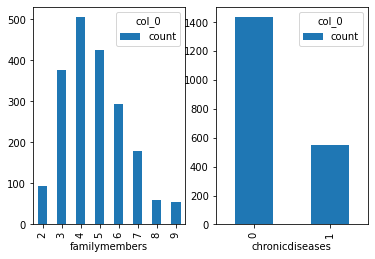

In [12]:
# Plot 2 of data 
fig, (ax3, ax4) = plt.subplots(1, 2)
pd.crosstab(index=data.iloc[:,5], columns="count").plot(kind="bar", ax= ax3)
pd.crosstab(index=data.iloc[:,6], columns="count").plot(kind="bar", ax= ax4)

plt.show()

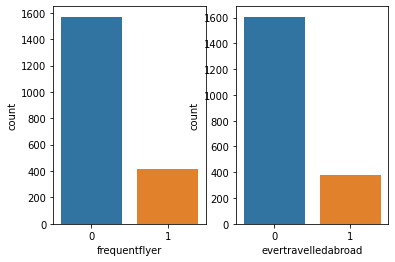

In [13]:
# Plot 3 of data 
fig, (ax5, ax6) = plt.subplots(1, 2)
sns.countplot(x = "frequentflyer", data = data, ax=ax5)
sns.countplot(x="evertravelledabroad", data = data,  ax= ax6)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


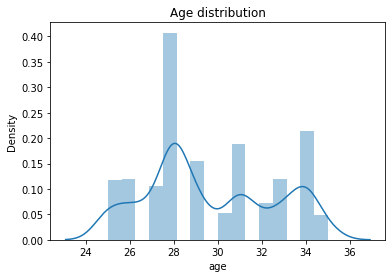

In [14]:
# Distplot: histogram with line using sns
sns.distplot(data["age"]).set_title("Age distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


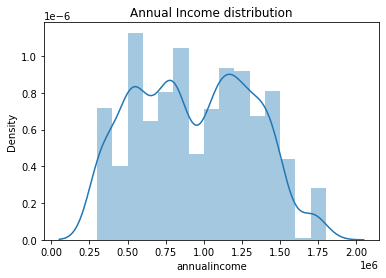

In [15]:
sns.distplot(data["annualincome"]).set_title("Annual Income distribution")
plt.show()

In [16]:
# Save of numeric data 
num_data = data.select_dtypes(include=np.number)

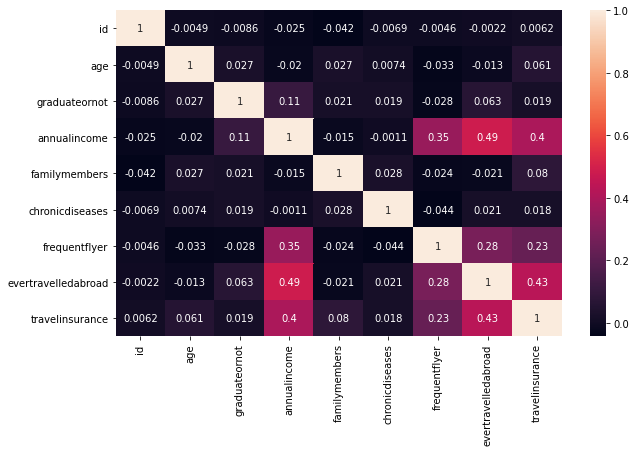

In [17]:
# Correlations Heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(num_data.corr(), annot=True)
plt.show()

Podemos concluir que la mayoría de los usuarios trabajan para el sector privado, poseen un grado universitario, tiene una media cuatro miembros en la familia, no sufren enfermedad crónica, no han viajado en los últimos dos años ni han viajado al extranjero. 

En cuanto a las correlaciones, no observamos correlaciones fuertes tanto positivas como negativas entre las variables.